# **1. Importing necessary libraries and loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)

# Load the dataset
file_path = "/content/drive/My Drive/Football.xlsx"
data = pd.read_excel(file_path)

#Printing the size of dataset
data.shape

#Dataset info
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POTM         419 non-null    float64
 1   Player       420 non-null    object 
 2   Nation       420 non-null    object 
 3   Team         420 non-null    object 
 4   Pos          420 non-null    object 
 5   Age          420 non-null    int64  
 6   MP           420 non-null    int64  
 7   Starts       420 non-null    int64  
 8   Min          420 non-null    int64  
 9   90s          420 non-null    float64
 10  Gls          420 non-null    int64  
 11  Ast          420 non-null    int64  
 12  G+A          420 non-null    int64  
 13  G-PK         420 non-null    int64  
 14  PKMade       420 non-null    int64  
 15  PKAttempt    420 non-null    int64  
 16  CrdY         420 non-null    int64  
 17  CrdR         420 non-null    int64  
 18  Suspension   420 non-null    object 
 19  Gls/90  

,POTM,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PKMade,PKAttempt,CrdY,CrdR,Gls/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
count,419.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.00000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,0.0,0.0,23.000000,23.000000,23.000000,23.00000,23.000000
mean,0.293556,25.576190,24.069048,17.828571,1595.478571,17.726667,2.47381,1.716667,4.190476,2.297619,0.176190,0.233333,3.123810,0.066667,0.140381,0.101071,0.241476,0.133000,0.234048,0.091434,0.063484,0.154918,0.085678,0.149162,NaN,NaN,0.115217,0.060435,0.175217,0.11000,0.170000
std,0.455935,3.966615,9.161635,10.710517,900.234383,10.000988,3.94736,2.336431,5.487404,3.488063,0.752025,0.925808,2.617894,0.259122,0.184618,0.139756,0.251821,0.172925,0.242567,0.124218,0.076385,0.166454,0.111398,0.155388,NaN,NaN,0.133173,0.046756,0.147459,0.12972,0.140421
min,0.000000,17.000000,3.000000,0.000000,113.000000,1.300000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.010000,0.030000,0.00000,0.030000
25%,0.000000,23.000000,17.000000,9.000000,823.250000,9.175000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.060000,0.000000,0.000000,0.043025,0.000000,0.041667,NaN,NaN,0.030000,0.030000,0.065000,0.03000,0.065000
50%,0.000000,25.000000,25.000000,17.000000,1493.500000,16.600000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.080000,0.060000,0.160000,0.070000,0.160000,0.052632,0.039231,0.100000,0.052632,0.098387,NaN,NaN,0.050000,0.060000,0.110000,0.05000,0.110000
75%,1.000000,29.000000,32.000000,26.000000,2288.000000,25.400000,3.00000,2.000000,6.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.210000,0.150000,0.370000,0.200000,0.362500,0.125000,0.097581,0.215402,0.117647,0.210526,NaN,NaN,0.160000,0.070000,0.245000,0.13500,0.245000
max,1.000000,37.000000,38.000000,38.000000,3420.000000,38.000000,36.00000,16.000000,44.000000,29.000000,7.000000,8.000000,14.000000,2.000000,1.270000,1.050000,2.120000,1.270000,2.120000,1.028571,0.500000,1.257143,0.828571,1.057143,NaN,NaN,0.500000,0.250000,0.510000,0.50000,0.510000


# **2. Data Cleaning**

In [ ]:
#Dropping Unnecessary Columns

data = data.drop(columns=data.columns[data.columns.str.contains('^Unnamed')])


In [ ]:
#Checking for Missing Values

print(data.isnull().sum())


POTM          1
Player        0
Nation        0
Team          0
Pos           0
Age           0
MP            0
Starts        0
Min           0
90s           0
Gls           0
Ast           0
G+A           0
G-PK          0
PKMade        0
PKAttempt     0
CrdY          0
CrdR          0
Suspension    0
Gls/90        0
Ast/90        0
G+A/90        0
G-PK/90       0
G+A-PK/90     0
Gls.1         0
Ast.1         0
G+A.1         0
G-PK.1        0
G+A-PK        0
dtype: int64


In [ ]:
#Check for Duplicate Rows

print(f"Duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()


Duplicate rows: 0


In [ ]:
# Renaming Variables for clarity

new_column_names = {
    'Pos': 'Position',
    'Gls': 'Goals',
    'Ast': 'Assists',
    'MP': 'Matches_Played',
    'Min': 'Minutes_Played',
    '90s': 'Nineties_Played',
    'G+A': 'Goals_and_Assists',
    # Add more mappings as needed
}

data.rename(columns=new_column_names, inplace=True)

print(data.head())


   POTM              Player Nation     Team Position  Age  Matches_Played  \
0   0.0  Gabriel Dos Santos    BRA  Arsenal       DF   24              38   
1   1.0         Bukayo Saka    ENG  Arsenal       FW   20              38   
2   1.0     Martin Ødegaard    NOR  Arsenal       MF   23              37   
3   1.0           Ben White    ENG  Arsenal       DF   24              38   
4   1.0        Granit Xhaka    SUI  Arsenal       MF   29              37   

   Starts  Minutes_Played  Nineties_Played  Goals  Assists  Goals_and_Assists  \
0      38            3409             37.9      3        0                  3   
1      37            3181             35.3     14       11                 25   
2      37            3127             34.7     15        7                 22   
3      36            3055             33.9      2        5                  7   
4      36            2993             33.3      7        7                 14   

   G-PK  PKMade  PKAttempt  CrdY  CrdR Suspension 

In [ ]:
# Datatype Check

#Validate Numeric Columns:
print(data[['Age', 'Minutes_Played', 'Goals']].dtypes)

#Categorical Conversion:
categorical_cols = ['Nation', 'Team', 'Position']
for col in categorical_cols:
    data[col] = data[col].astype('category')

#Consistency
print(data['Position'].unique())  # Ensure positions are spelled consistently

# Check datatypes of all columns
print(data.dtypes)

# Optimize categorical columns
categorical_cols = ['Nation', 'Team', 'Position']  # Add others if needed
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Verify the changes
print(data.info())



Age               int64
Minutes_Played    int64
Goals             int64
dtype: object
['DF', 'FW', 'MF']
Categories (3, object): ['DF', 'FW', 'MF']
POTM                  float64
Player                 object
Nation               category
Team                 category
Position             category
Age                     int64
Matches_Played          int64
Starts                  int64
Minutes_Played          int64
Nineties_Played       float64
Goals                   int64
Assists                 int64
Goals_and_Assists       int64
G-PK                    int64
PKMade                  int64
PKAttempt               int64
CrdY                    int64
CrdR                    int64
Suspension             object
Gls/90                float64
Ast/90                float64
G+A/90                float64
G-PK/90               float64
G+A-PK/90             float64
Gls.1                 float64
Ast.1                 float64
G+A.1                 float64
G-PK.1                float64
G+A-PK      

# **3 Visualization**

<ipython-input-41-442a1b0d474c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Position', y='Age', palette='Set3')


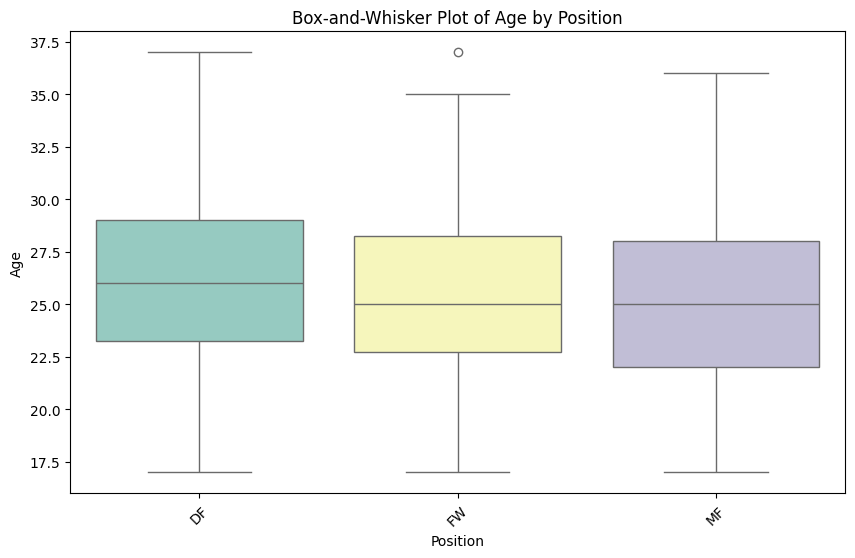

In [ ]:
#Boxplot: Age by Position

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of age distribution by position
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Position', y='Age', palette='Set3')
plt.title('Box-and-Whisker Plot of Age by Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


<ipython-input-43-3dc1e9d91fdf>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_goals = data.groupby('Team')['Goals'].sum().sort_values(ascending=False)
<ipython-input-43-3dc1e9d91fdf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_goals.values, y=team_goals.index, palette='viridis')


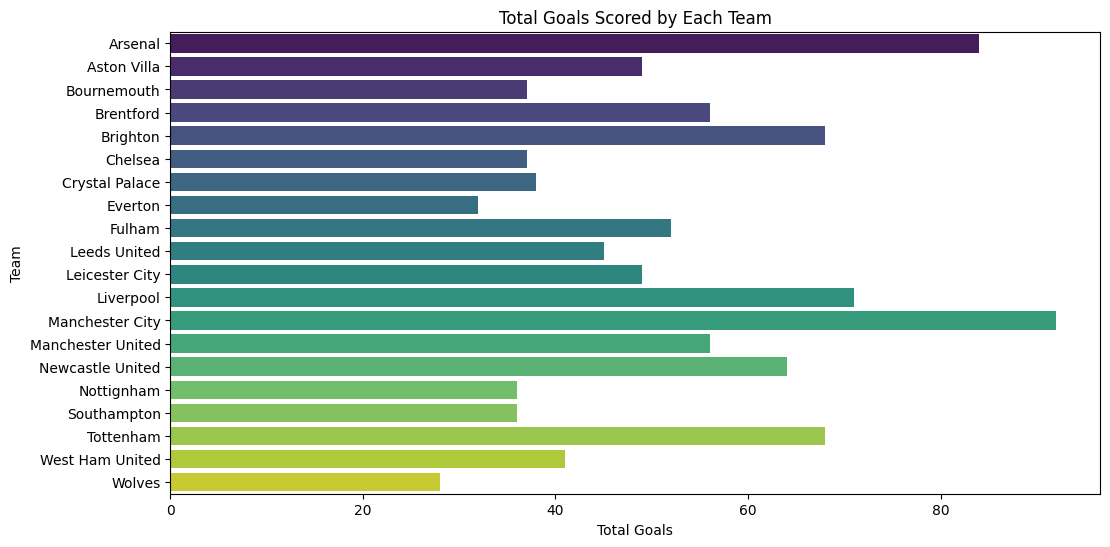

In [ ]:
# Goals Scored by Each Team

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total goals scored by each team
team_goals = data.groupby('Team')['Goals'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=team_goals.values, y=team_goals.index, palette='viridis')
plt.title('Total Goals Scored by Each Team')
plt.xlabel('Total Goals')
plt.ylabel('Team')
plt.show()


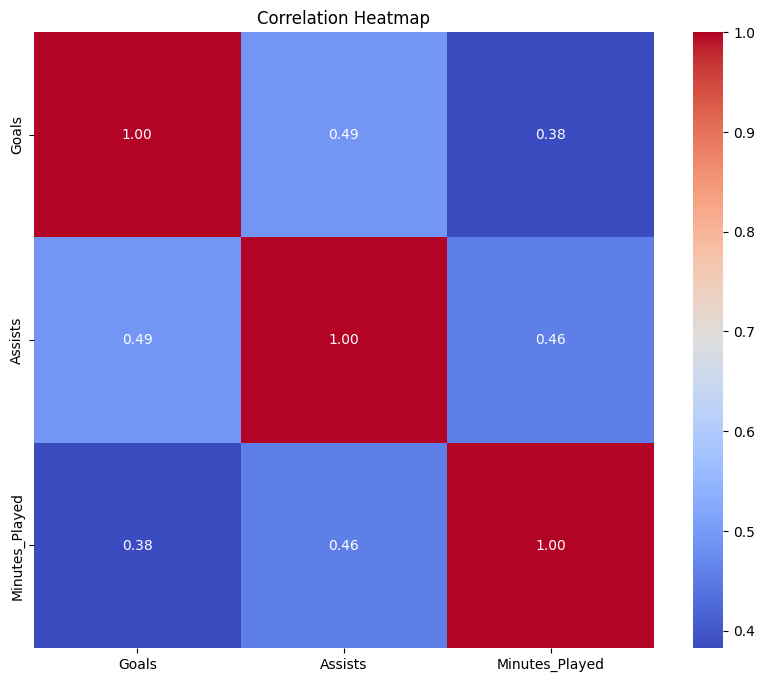

In [ ]:
#Visualizing the correlation matrix for three variables: Goals, Assists, and Minutes Played.

plt.figure(figsize=(10, 8))
sns.heatmap(data[['Goals', 'Assists', 'Minutes_Played']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()




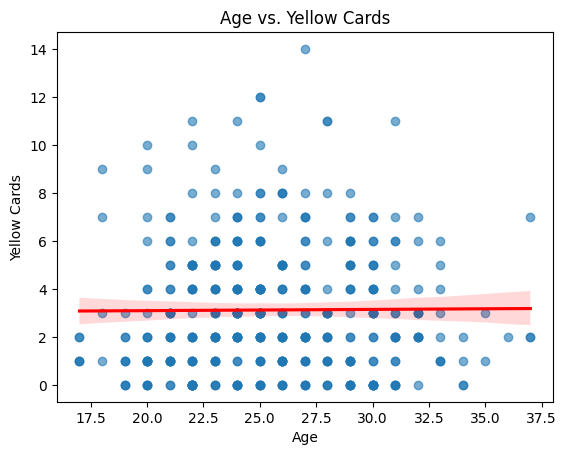

In [ ]:
#Age vs. Discipline - Relationship between age and yellow cards (CrdY) received - Scatter plot with regression line

sns.regplot(data=data, x='Age', y='CrdY', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Age vs. Yellow Cards')
plt.xlabel('Age')
plt.ylabel('Yellow Cards')
plt.show()


# **4 Building ML Models**

Model 1: Linear regression model to predict the number of goals scored (Gls) based on playing time (Min), match starts (Starts), assists (Ast), and position-related variables.

Columns in dataset: Index(['POTM', 'Player', 'Nation', 'Team', 'Age', 'Matches_Played', 'Starts',
       'Minutes_Played', 'Nineties_Played', 'Goals', 'Assists',
       'Goals_and_Assists', 'G-PK', 'PKMade', 'PKAttempt', 'CrdY', 'CrdR',
       'Suspension', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'Position_FW',
       'Position_MF'],
      dtype='object')
Position column not found. Skipping encoding.

Model Evaluation Metrics:
Root Mean Squared Error: 2.3766291829134096
Mean Absolute Error: 1.8160954144205055
R-squared: 0.4824244195314227
Adjusted R-squared: 0.4562180610266846


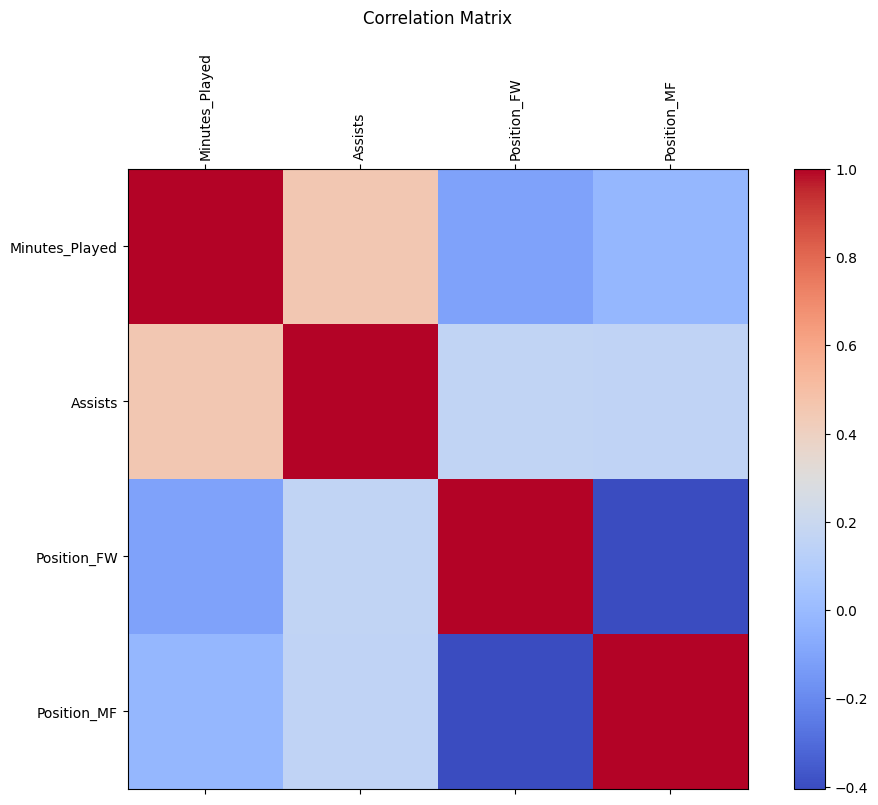


Model Coefficients:
                Coefficient
Minutes_Played     0.001623
Assists            0.350063
Position_FW        5.359270
Position_MF        1.786317


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Verify columns in the dataset
print("Columns in dataset:", data.columns)

# Encode categorical columns if needed
if 'Position' in data.columns:
    categorical_cols = ['Position']
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
    print("Categorical encoding applied.")
else:
    print("Position column not found. Skipping encoding.")

# Define features (X) and target (y), excluding 'Starts'
X = data[['Minutes_Played', 'Assists', *data.filter(like='Position_').columns]]  # 'Starts' removed
y = data['Goals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

# Correlation Analysis
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[0]), correlation_matrix.columns)
plt.show()

# Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)


In [ ]:
print(data.columns)

Index(['POTM', 'Player', 'Nation', 'Team', 'Age', 'Matches_Played', 'Starts',
       'Minutes_Played', 'Nineties_Played', 'Goals', 'Assists',
       'Goals_and_Assists', 'G-PK', 'PKMade', 'PKAttempt', 'CrdY', 'CrdR',
       'Suspension', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'Position_FW',
       'Position_MF'],
      dtype='object')


Model 2: To classify whether a player wins "Player of the Match" (POTM) based on performance metrics.

Missing values in POTM column: 1
Missing values in POTM column after cleaning: 0
Accuracy: 0.8095238095238095
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        62
         1.0       0.65      0.59      0.62        22

    accuracy                           0.81        84
   macro avg       0.75      0.74      0.75        84
weighted avg       0.80      0.81      0.81        84

Confusion Matrix:
 [[55  7]
 [ 9 13]]

Feature Importances:
                Importance
Goals             0.757381
Minutes_Played    0.144498
Starts            0.063852
Assists           0.034269


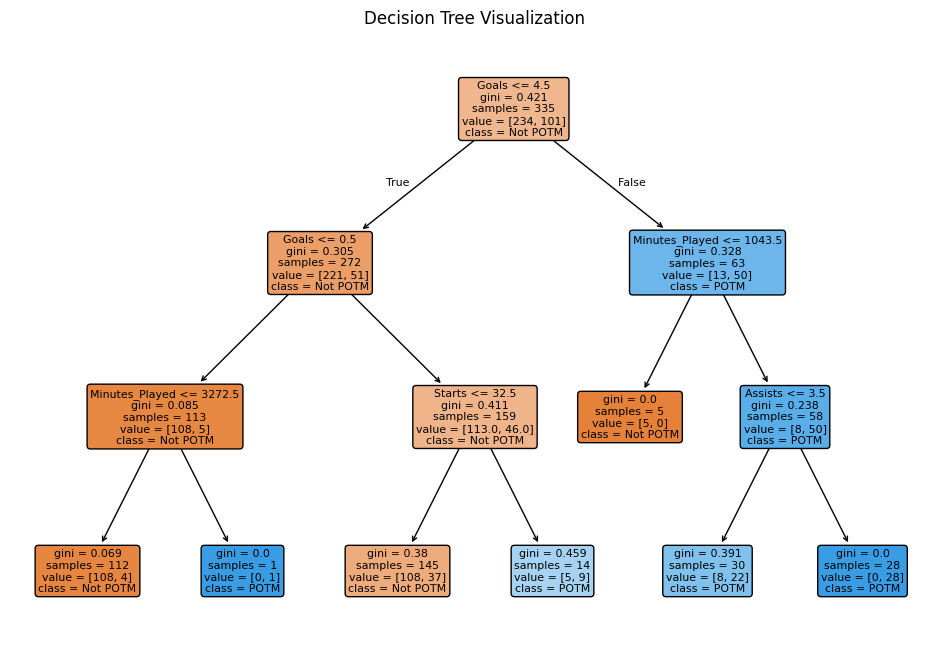

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Check for missing values in the target column
print("Missing values in POTM column:", data['POTM'].isnull().sum())

# Drop rows where POTM is missing
data = data.dropna(subset=['POTM'])

# Ensure target is now clean
print("Missing values in POTM column after cleaning:", data['POTM'].isnull().sum())

# Define features (X) and target (y)
X = data[['Goals', 'Assists', 'Starts', 'Minutes_Played']]  # Add other performance metrics if available
y = data['POTM']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Set max_depth to limit the size of the tree
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Display feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not POTM', 'POTM'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Model 3: Logistic Regression model to predict whether a player wins Player of the Match (POTM) based on their performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target (y)
X = data[['Goals', 'Assists', 'Starts', 'Minutes_Played']]  # Add more performance metrics if necessary
y = data['POTM']  # Ensure this column is binary (0 or 1)

# Handle missing values (if any)
X = X.fillna(0)  # Replace missing values with 0 (or any suitable method)
y = y.fillna(0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
import numpy as np
coefficients = pd.DataFrame(np.exp(model.coef_[0]), index=X.columns, columns=['Odds Ratio'])
print("\nFeature Importance (Odds Ratios):\n", coefficients)


Accuracy: 0.8452380952380952

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        62
         1.0       0.80      0.55      0.65        22

    accuracy                           0.85        84
   macro avg       0.83      0.75      0.77        84
weighted avg       0.84      0.85      0.83        84


Confusion Matrix:
 [[59  3]
 [10 12]]

Feature Importance (Odds Ratios):
                 Odds Ratio
Goals             1.500652
Assists           1.162794
Starts            0.846275
Minutes_Played    1.002373
